In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def LoadData(file,deli):
    data = np.loadtxt(file,delimiter=deli)
    print("Dimensions",data.shape)
    print("First 5 Rows : ")
    print(data[1:5,:])
    return(data)

In [3]:
data = LoadData('data/ex2data1.txt',',')

Dimensions (100, 3)
First 5 Rows : 
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


In [4]:
X = data[:,0:2]
y = data[:,-1]

In [5]:
print("X Shape",X.shape)
print("y Shape",y.shape)

X Shape (100, 2)
y Shape (100,)


In [6]:
def InsertOnes(X):
    return np.c_[np.ones(X.shape[0]),X]

In [7]:
def Sigmoid(t):
    return 1/ (1+ np.exp(-1*t))

In [8]:
def h(theta,X):
    return(Sigmoid(X.dot(theta)))

In [9]:
def PlotData(X,y):
    pos = X[y==1]
    neg = X[y==0]
    plt.scatter(pos[:,0],pos[:,1],marker ='o',c='black',label='Admitted')
    plt.scatter(neg[:,0],neg[:,1],marker ='x',c='red',label='Not Admitted')
    plt.legend(loc='lower left',frameon=False)
    plt.figure(figsize=(12,8)) 

In [10]:
X_bias = InsertOnes(X)
theta = np.zeros(X_bias.shape[1])

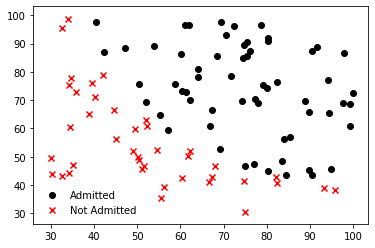

<Figure size 864x576 with 0 Axes>

In [11]:
PlotData(X,y)

In [12]:
#def CostFunction(X,y,theta):
#    m = X.shape[0]
#    J = (1/m)*np.sum( -y*np.log(h(X,theta)) - (1-y)*np.log(h(X,theta)) )
#    return J
def costFunction(theta, X, y):
    m = y.size
    h = Sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    return np.sum(J)



In [13]:
def CostFunction(theta,X,y):
    m = X.shape[0]
    J = (-1/m)*np.sum( y*np.log(h(theta,X)) + (1-y)*np.log(h(theta,X)) )
    return J

In [14]:
print(CostFunction(theta,X_bias,y))

0.6931471805599453


In [15]:
def Gradient(theta,X,y):
    hthetaX = h(theta,X)
    grad = np.dot(np.transpose(X), (hthetaX - y))
    return grad/X.shape[0]

In [16]:
print('Gradient : ',Gradient(theta,X_bias,y))

Gradient :  [ -0.1        -12.00921659 -11.26284221]


In [17]:
from scipy.optimize import minimize
res = minimize(costFunction, x0=theta, args=(X_bias,y), method = None, jac=Gradient, options={'maxiter':1500})
res

/Users/ananyapa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


      fun: 0.2034977015894438
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476821e-09, -9.31921318e-07, -2.82608929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [18]:
def predict(theta,X,threshold=0.5):
    P = h(theta,X) >= threshold
    return(P.astype('int'))

In [19]:
p = predict(res.x,X_bias)
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


### Creating the Decision Boundry

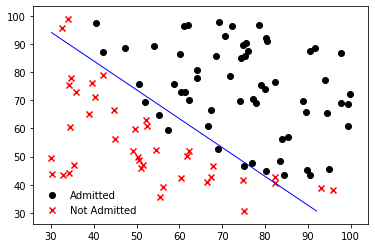

<Figure size 864x576 with 0 Axes>

In [20]:
# Creating the Mix Max Value
x1_min, x1_max = X_bias[:,1].min(), X_bias[:,1].max(),
x2_min, x2_max = X_bias[:,2].min(), X_bias[:,2].max(),

# Creating the Meshgrid of numbers from min to max both X and Y AXIS 
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

# Calculating the Predicted value for the numbers using the claulcated min theta 
meshdata = np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()]
hx = Sigmoid(meshdata.dot(res.x))
hx = hx.reshape(xx1.shape)

#Plotting the values for the meshgrid we just created
plt.contour(xx1, xx2, hx, [0.5], linewidths=1, colors='b');

#Plotting positive Nehative numbers 
PlotData(X,y)
plt.show()

### Doing Everything with SKLEARN

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [22]:
# Peaking at the data 
X[1:5,:]

array([[30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [23]:
y[1:5]

array([0., 0., 1., 1.])

In [24]:
SS = StandardScaler()
Xscaled = SS.fit_transform(X)
Xscaled[1:4,:]

array([[-1.82625564, -1.2075414 ],
       [-1.53903969,  0.3612943 ],
       [-0.28210129,  1.0863683 ]])

In [25]:
clf = LogisticRegression(random_state=123)
clf.fit(Xscaled,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
prediction = clf.predict(Xscaled)
from sklearn.metrics import confusion_matrix
confusion_matrix(y,prediction)

array([[34,  6],
       [ 5, 55]])

In [27]:
print("Model Accuracy = {}%".format(np.sum(prediction==y)/y.size))

Model Accuracy = 0.89%


### Lets Try Splitting the Data 

In [28]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33)

In [29]:
clf.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
prediction = clf.predict(Xtest)
confusion_matrix(ytest,prediction)

array([[12,  2],
       [ 2, 17]])

In [31]:
print("Model Accuracy = {}%".format(np.sum(prediction==ytest)/ytest.size))

Model Accuracy = 0.8787878787878788%


Model Accuracy Decreased when we assumed less data but it might be good for prediction more test data.

### Overfitting v/s Underfitting

The model seem to underfit and with introducing more features with higher degrees we can improove the model fit

In [32]:
# Function to introduce more features 
def map_feature(x1, x2,degree=4):
    '''
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)
            

    return out

In [33]:
Xfeat = map_feature(X[:,0],X[:,1],degree=2)
Xsfeat = SS.fit_transform(Xfeat)
Xsfeat_bias = InsertOnes(Xsfeat)
theta=np.zeros(Xsfeat_bias.shape[1])

res = minimize(costFunction, x0=theta, args=(Xsfeat_bias,y), method = None, jac=Gradient, options={'maxiter':1500})
res

/Users/ananyapa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/ananyapa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


      fun: nan
 hess_inv: array([[ 2.62876055e+02,  0.00000000e+00,  1.43321386e+02,
         1.25452008e+02, -2.23018759e+02,  6.05170700e+02,
        -1.95328093e+02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.43321386e+02,  0.00000000e+00,  8.28103646e+01,
         7.09305288e+01, -1.20326554e+02,  3.37049345e+02,
        -1.06010974e+02],
       [ 1.25452008e+02,  0.00000000e+00,  7.09305288e+01,
         6.27642236e+01, -1.03181741e+02,  2.90716989e+02,
        -9.06234059e+01],
       [-2.23018759e+02,  0.00000000e+00, -1.20326554e+02,
        -1.03181741e+02,  2.37134764e+02, -5.69278275e+02,
         2.09563014e+02],
       [ 6.05170700e+02,  0.00000000e+00,  3.37049345e+02,
         2.90716989e+02, -5.69278275e+02,  1.48106447e+03,
        -5.03531847e+02],
       [-1.95328093e+02,  0.00000000e+00, -1.06010974e+02,
        -9.06234059e+01,  2.09563014e+02, -5.035318

In [34]:
p = predict(res.x,Xsfeat_bias)
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 100.0%


### Using Sklearn for Polynomial Features

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
Xpoly = poly.fit_transform(X)

In [36]:
Xpolyscaled=SS.fit_transform(Xpoly)
clf.fit(Xpolyscaled,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
pred = clf.predict(Xpolyscaled)
confusion_matrix(y,pred)

array([[36,  4],
       [ 5, 55]])

In [38]:
print('Train accuracy {}%'.format(100*sum(pred == y.ravel())/pred.size))

Train accuracy 91.0%


## Regularization 

We will consider another data and clasification for Regularization

In [39]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='red', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='black', s=30, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [40]:
data = LoadData('data/ex2data2.txt', ',')

Dimensions (118, 3)
First 5 Rows : 
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]


In [41]:
y = np.c_[data[:,2]]
X = data[:,0:2]

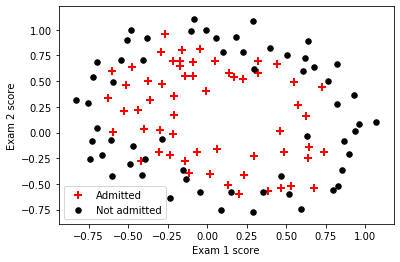

In [42]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

## Regularised Cost Function : Vectorised Form

$$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2} $$

In [43]:
def costFunctionReg(theta, reg, X,y):
    m = y.size
    h = Sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [44]:
poly = PolynomialFeatures(degree=4)
Xpoly = poly.fit_transform(X)
Xpoly.shape

(118, 15)

In [45]:
def gradientReg(theta, reg, X,y):
    m = y.size
    h = Sigmoid(X.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [46]:
initial_theta = np.zeros(Xpoly.shape[1])
costFunctionReg(initial_theta, 1, Xpoly, y)

0.6931471805599453

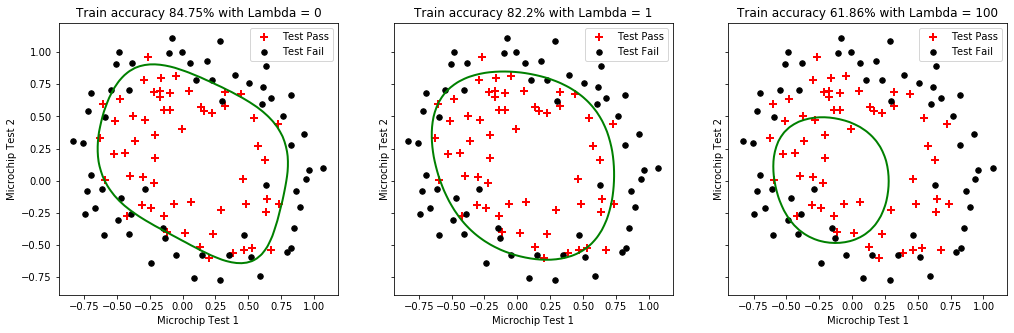

In [47]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0, 1, 100]):
    # Optimize costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, Xpoly, y), method=None, jac=gradientReg, options={'maxiter':3000})
    
    # Accuracy
    accuracy = 100*sum(predict(res2.x, Xpoly) == y.ravel())/y.size    

    # Scatter plot of X,y
    plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'Test Pass', 'Test Fail', axes.flatten()[i])
    
    # Plot decisionboundary
    
    # Creating the meshgrid
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    
    # For Each data point the predicted value is plotted.
    # Creatin a 1 single array from xx1 and xx2 adn then predicting values 
    preparedData = poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()])
    
    # Calculating the predicted value 
    hh = Sigmoid(preparedData.dot(res2.x))
    hh = hh.reshape(xx1.shape)
    
    # Plotting the Predicted Value 
    axes.flatten()[i].contour(xx1, xx2, hh, [0.5], linewidths=2, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))